In [51]:
import torch
from torch import nn
import logging
from credit.models import load_model
import yaml
from glob import glob
import os
from os.path import join
import xarray as xr
from credit.physics_constants import GRAVITY
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import numpy as np
from cartopy.feature import COASTLINE
import imageio

from credit.parser import CREDIT_main_parser

# from credit.models.skebs_model import SKEBS


logger = logging.getLogger(__name__)

In [43]:
static_ds = xr.open_dataset("/glade/campaign/cisl/aiml/wchapman/MLWPS/STAGING/f.e21.CREDIT_climate.statics_1.0deg.nc")

In [48]:
debug_folder = "/glade/work/dkimpara/CREDIT_runs/skebs_ensemble/debug_skebs/"
perturb_files = sorted(glob("/glade/work/dkimpara/CREDIT_runs/skebs_ensemble/debug_skebs/perturb_*"))
x_perturbed_tensors = sorted(glob("/glade/work/dkimpara/CREDIT_runs/skebs_ensemble/debug_skebs/x_*"))

In [45]:
perturb_tensors = [torch.load(file,  map_location=torch.device('cpu')).squeeze(2) for file in perturb_files]
x =  torch.load(x_perturbed_tensors[0],  map_location=torch.device('cpu'))
perturb = torch.stack(perturb_tensors)

# add coords to perturbation array
shape = perturb.shape
p_ds = xr.DataArray(perturb, coords=[('ts', range(shape[0])),
                                      ('batch', range(shape[1])),
                                      ('levels', range(shape[2])),
                                      ('latitude', static_ds.latitude.values),
                                      ('longitude', static_ds.longitude.values)])


/glade/derecho/scratch/dkimpara/tmp/ipykernel_36505/2097855545.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  perturb_tensors = [torch.load(file,  map_location=torch.de

In [59]:
axs.shape

(2,)

-0.010631149980504025 66.481895377653
-62.50390851241404 14.879845413934326
-23.207582841861512 55.175014484773186
-52.00275469463404 0.00037600540943572014
-68.35179871675787 0.009760981847010797
-34.38568210495502 0.03670142169644999
-19.02645271646984 8.947713212812982
-40.16143769423827 22.449518880298434
-9.990603263613078 34.543532748767355
-7.50379455408741 25.16571108157688
-0.017812969764836872 63.415816345586464
-55.521807234128616 40.78132777279707
-0.005604437472480184 47.754936199461845
-49.95451388037971 17.454426167828093
-16.10768309991321 36.05147510776629
-33.59584185874266 0.0030193264929389008
-53.601185633201496 0.010553419210507675
-33.87485336618574 0.013946615577109148
-23.26006658346261 12.318769495341499
-36.553498738411434 26.101213835974068


/glade/derecho/scratch/dkimpara/tmp/ipykernel_36505/3847020298.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(6, 12))


-14.40260375931723 32.377756462207934
-7.207604505943117 27.136225834114317
-0.01487182601951275 49.24021584948088
-34.86471144496529 29.98434133391666


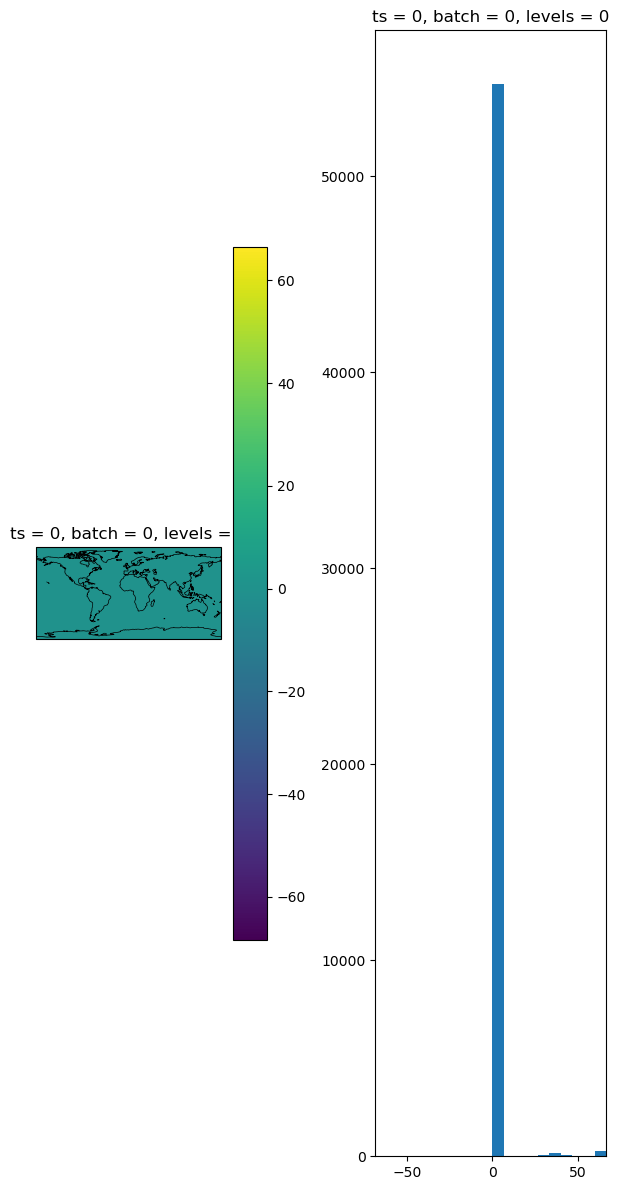

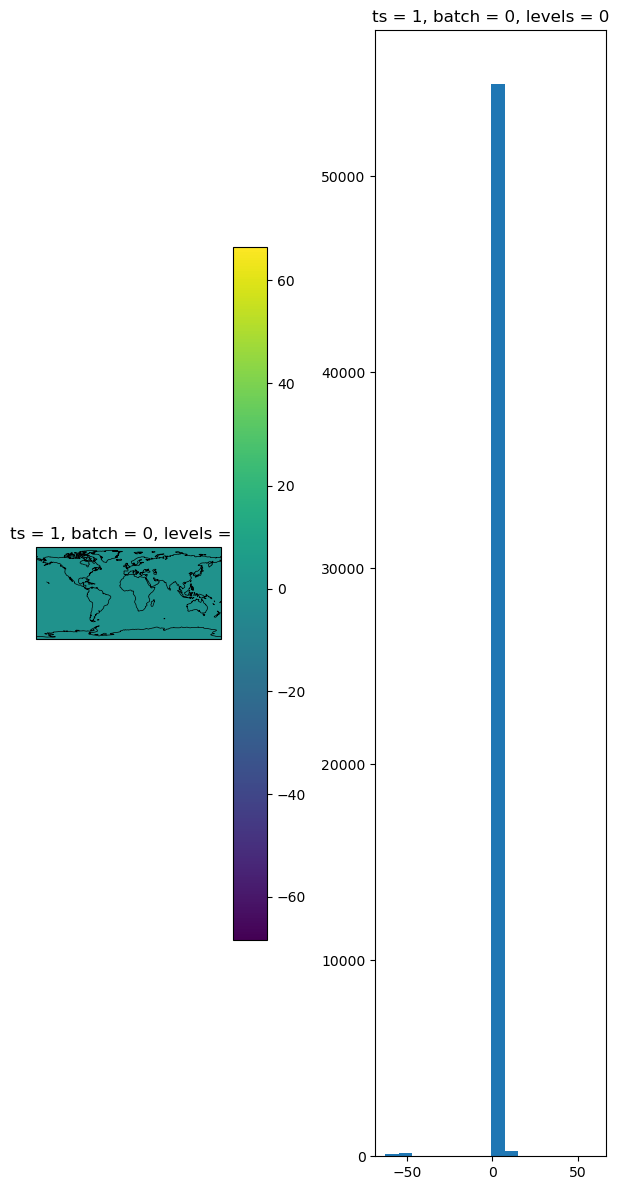

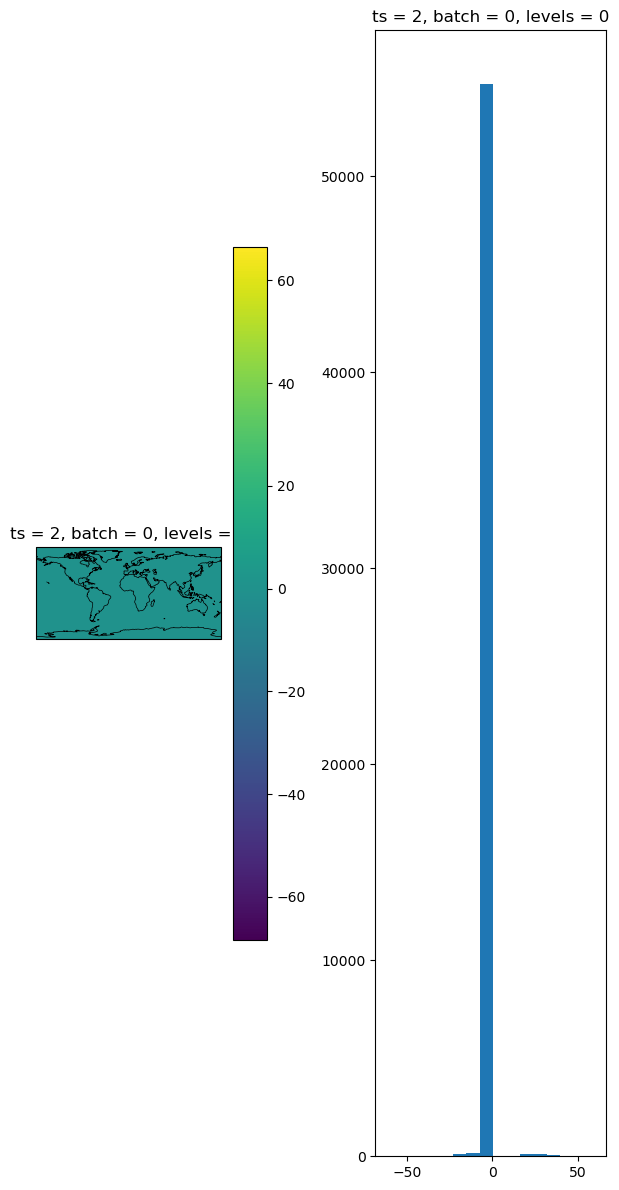

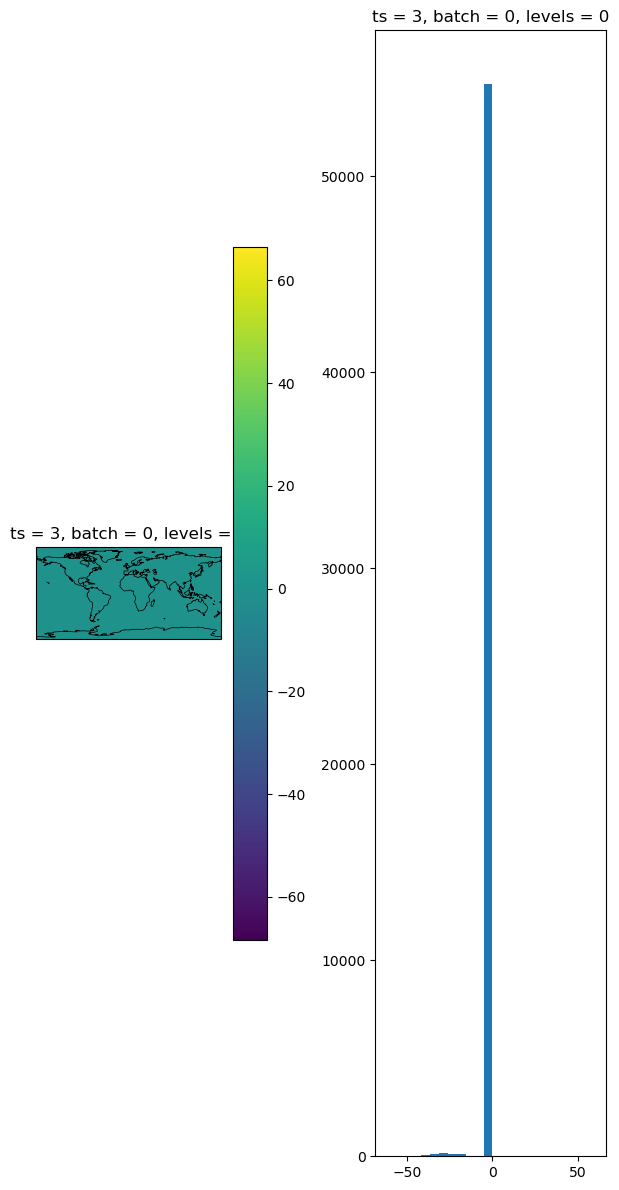

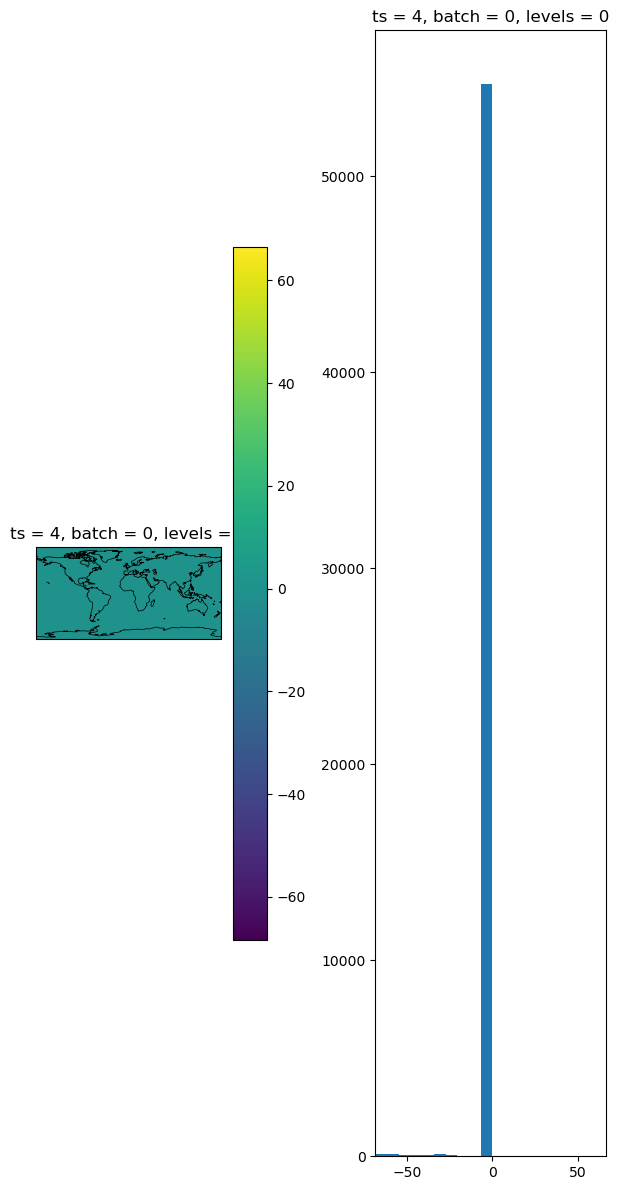

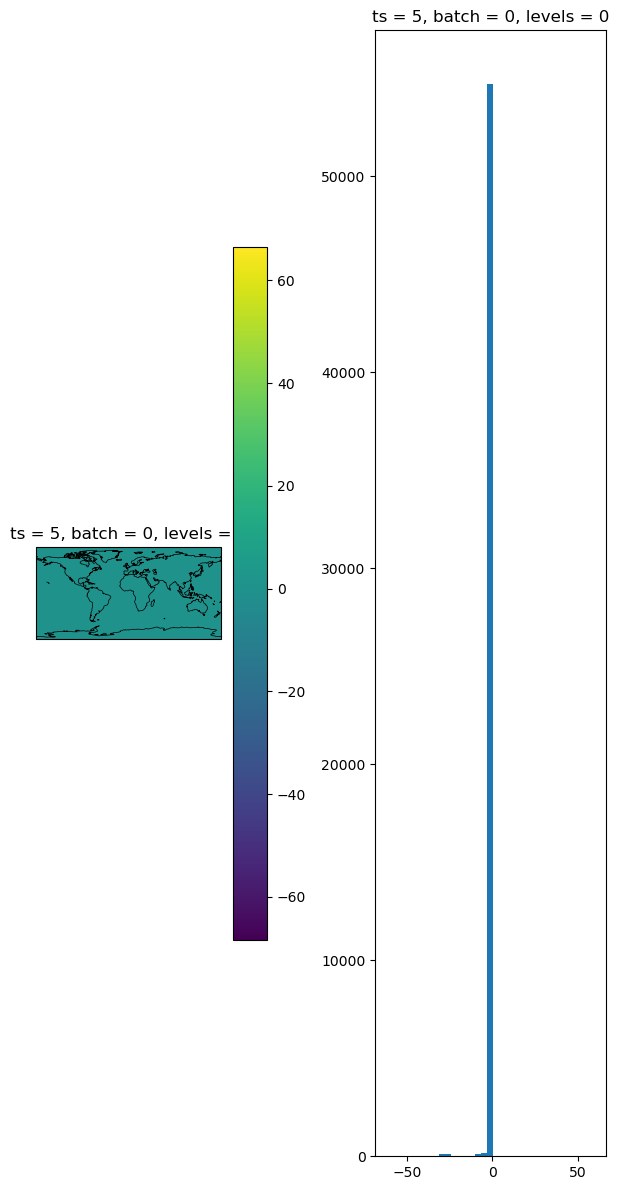

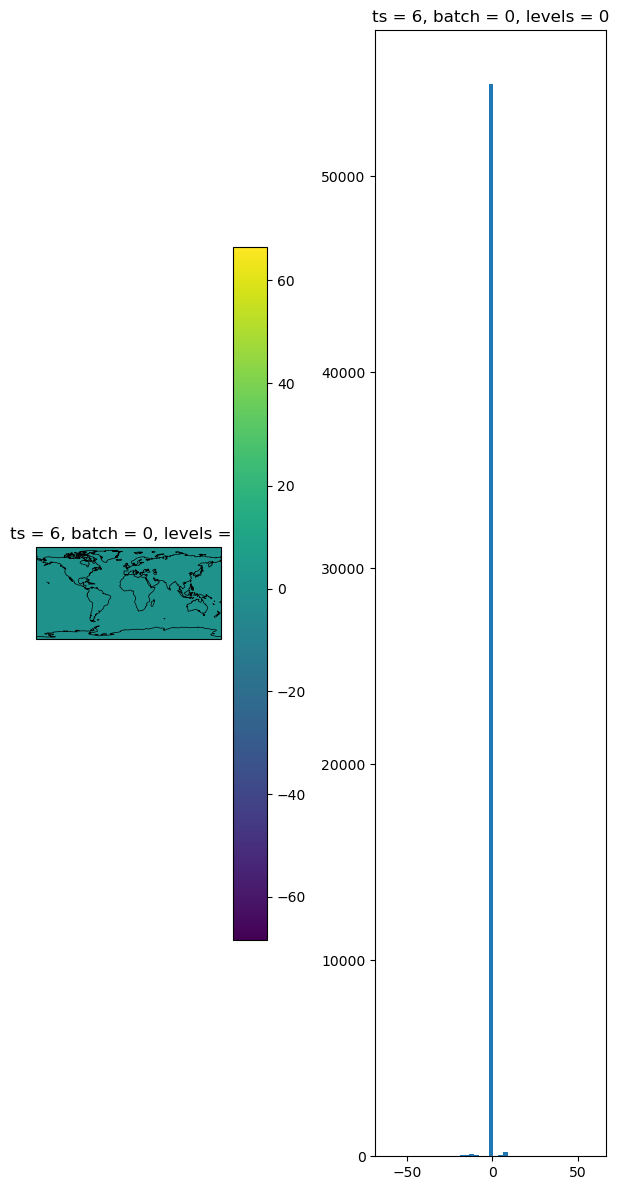

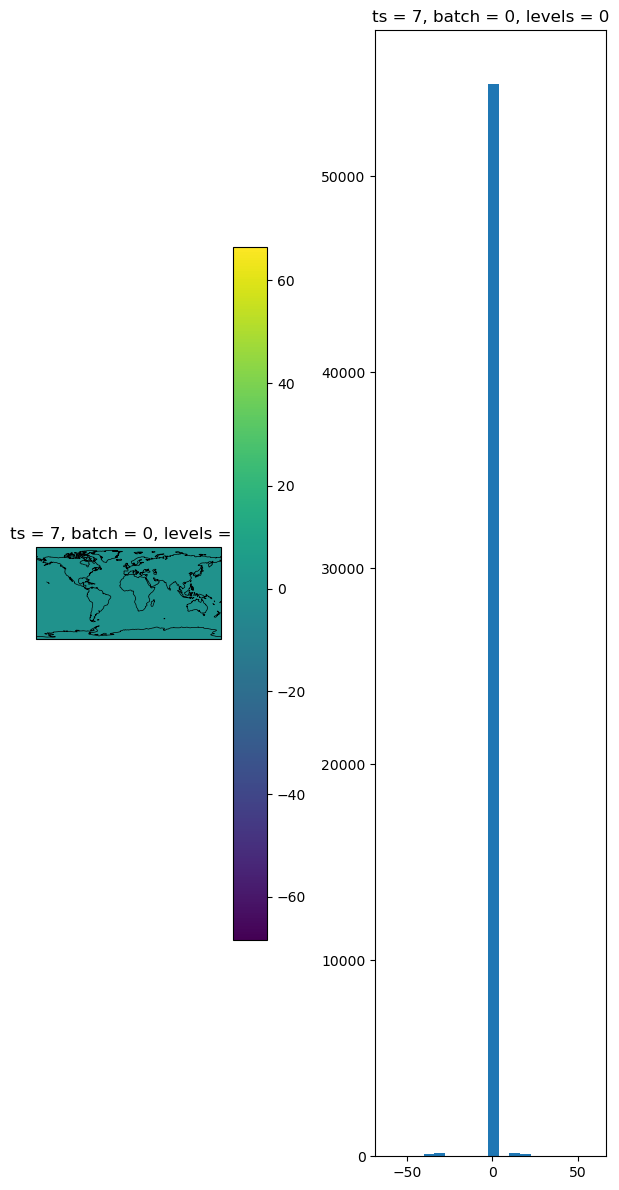

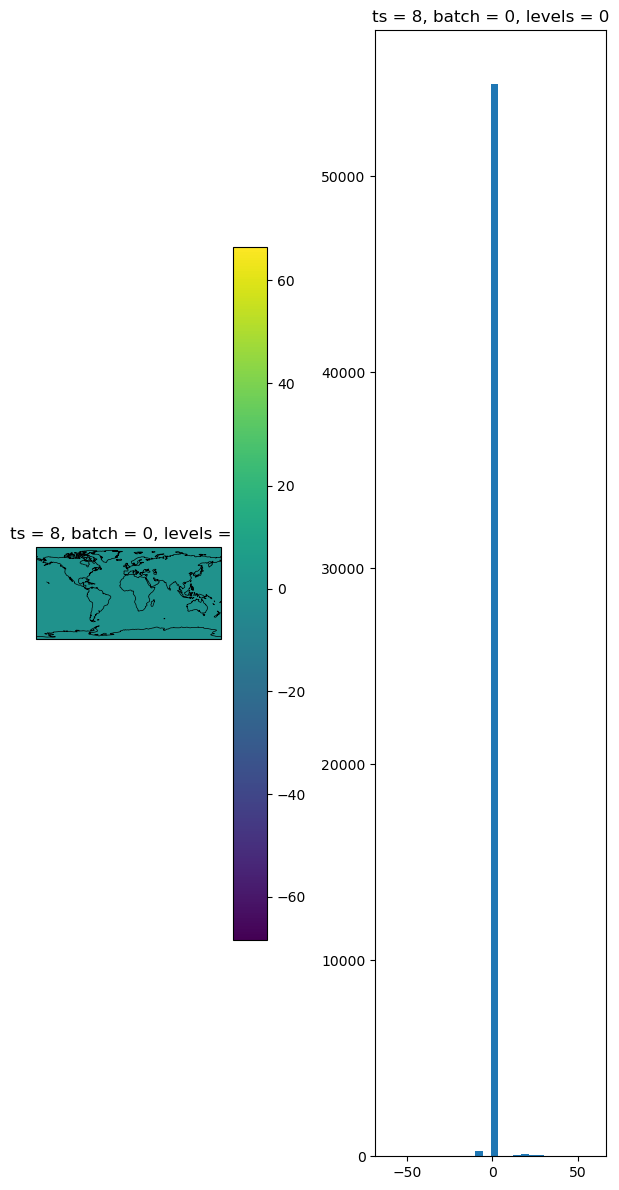

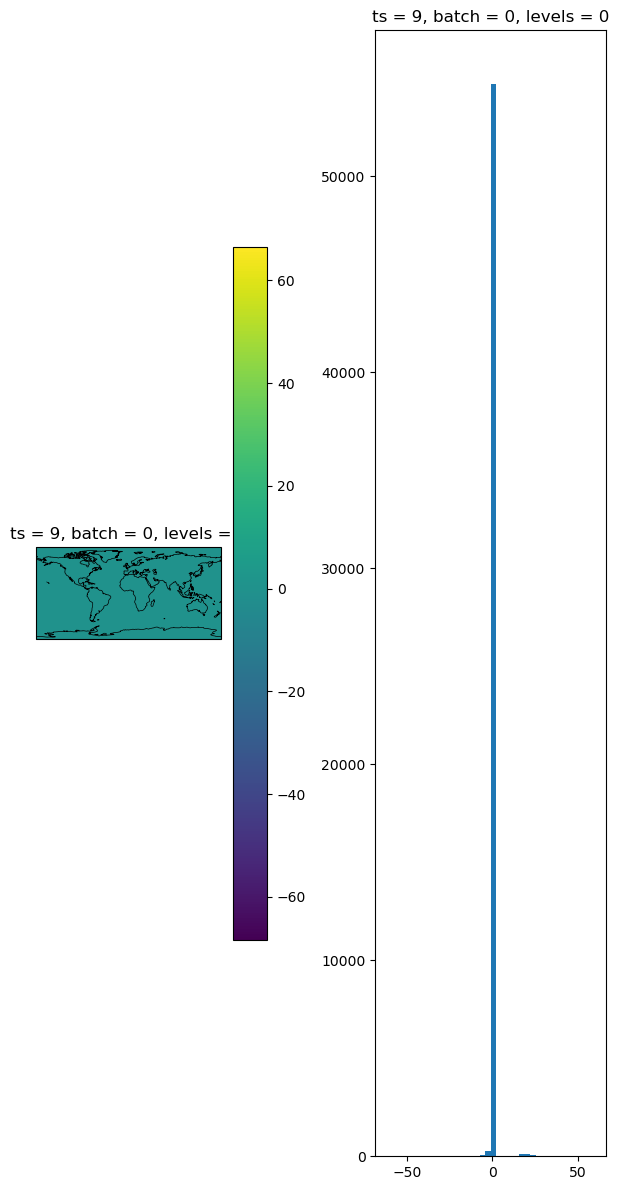

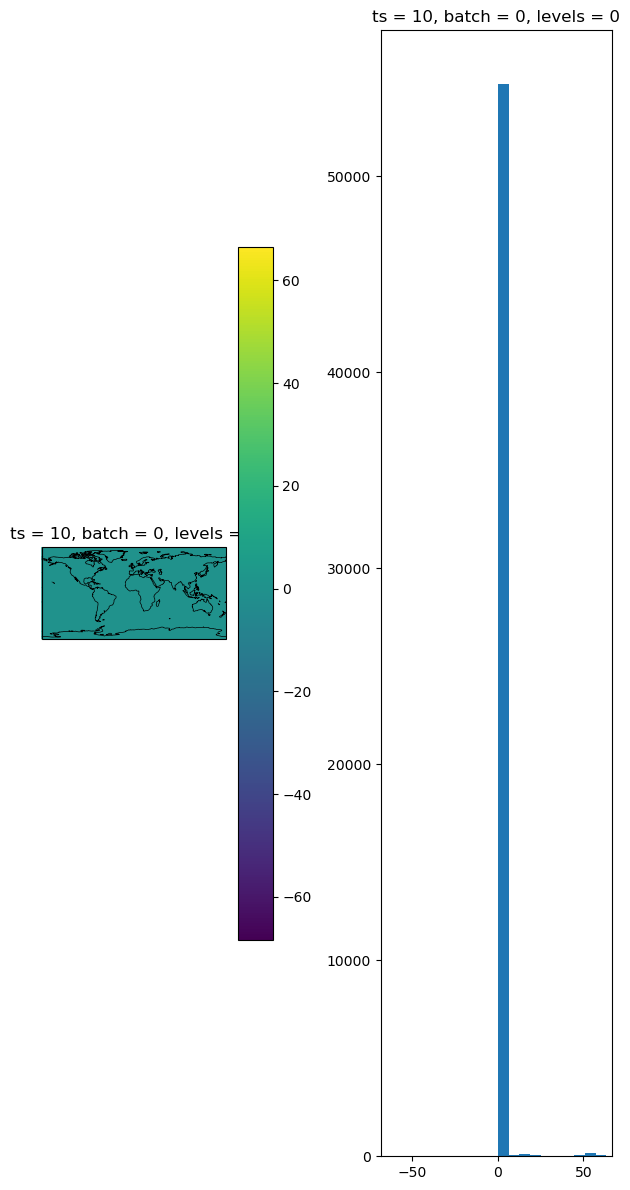

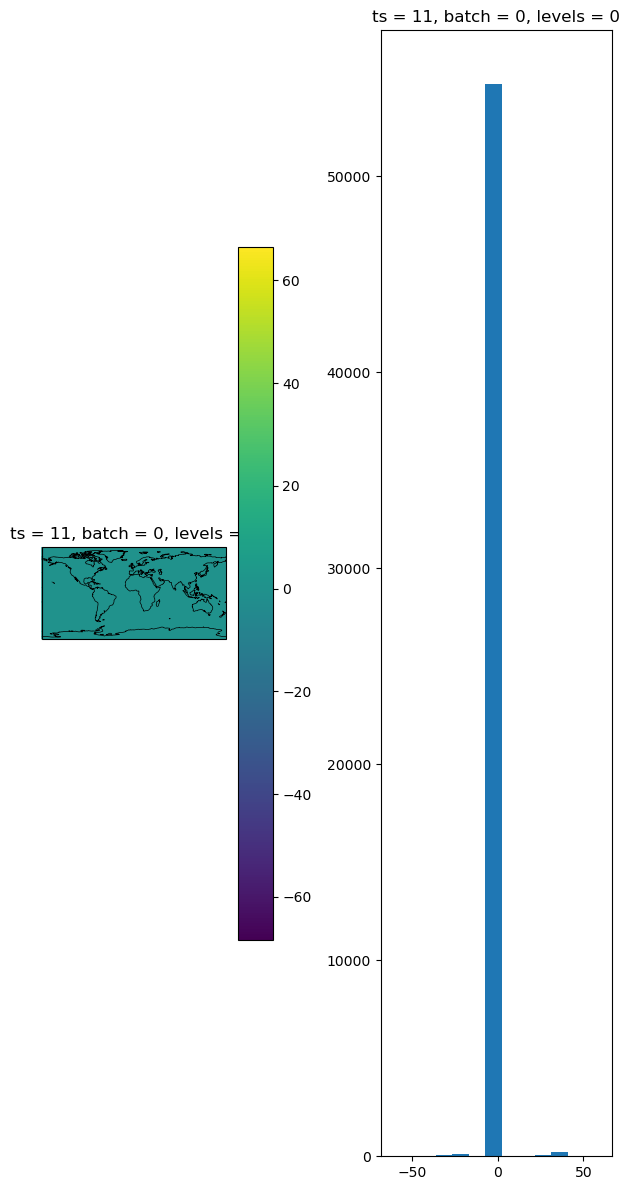

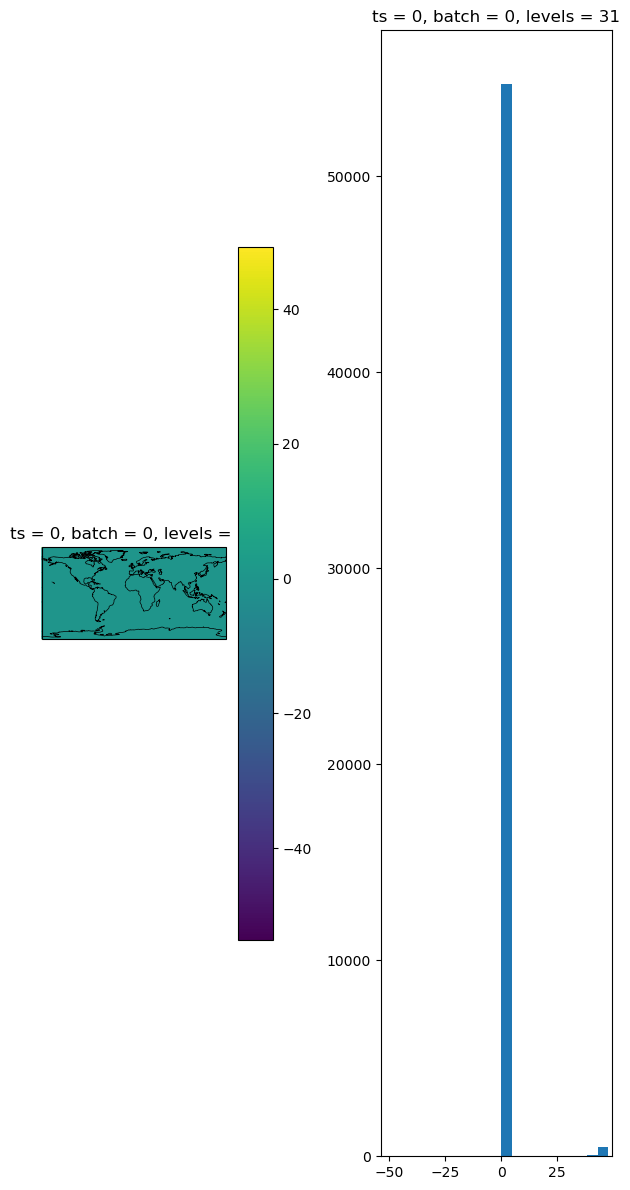

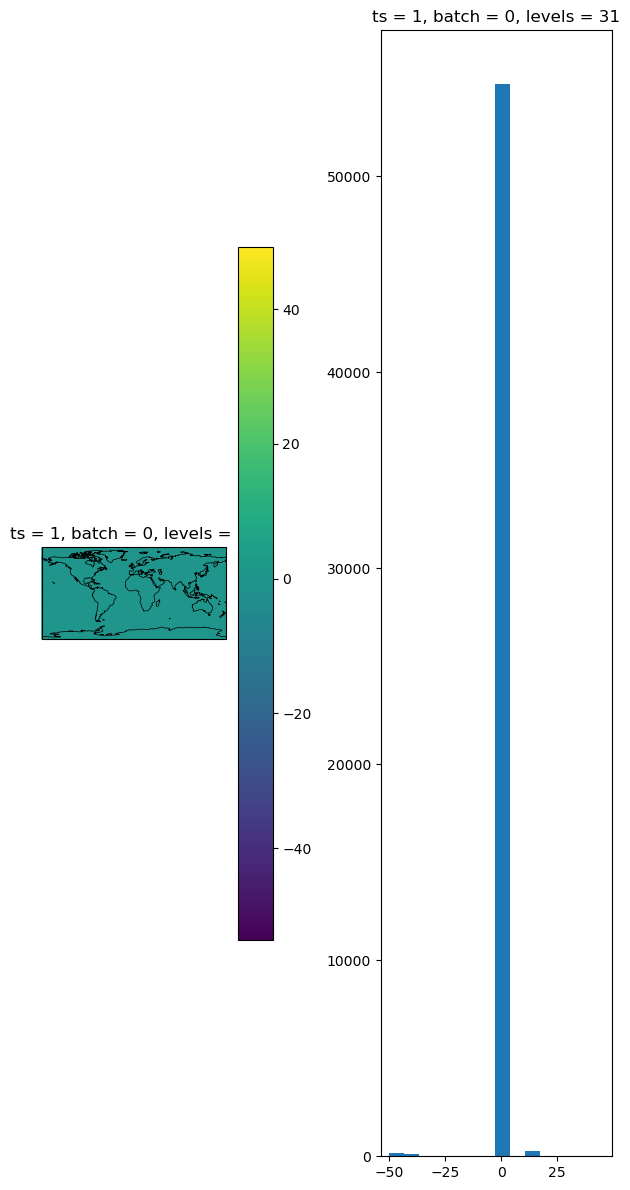

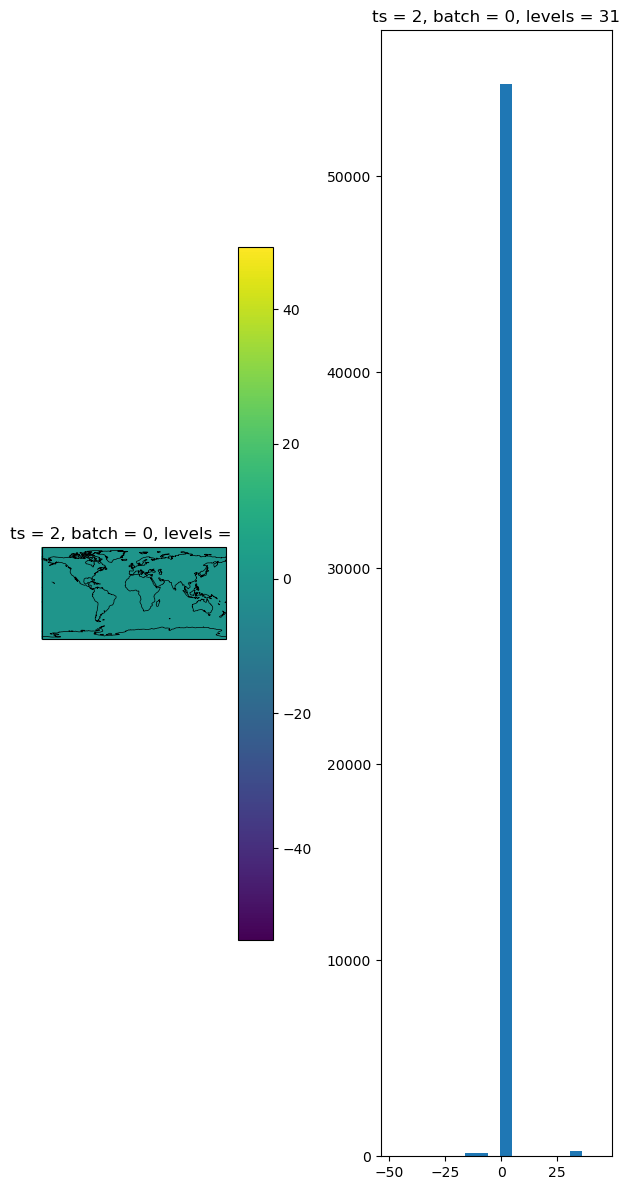

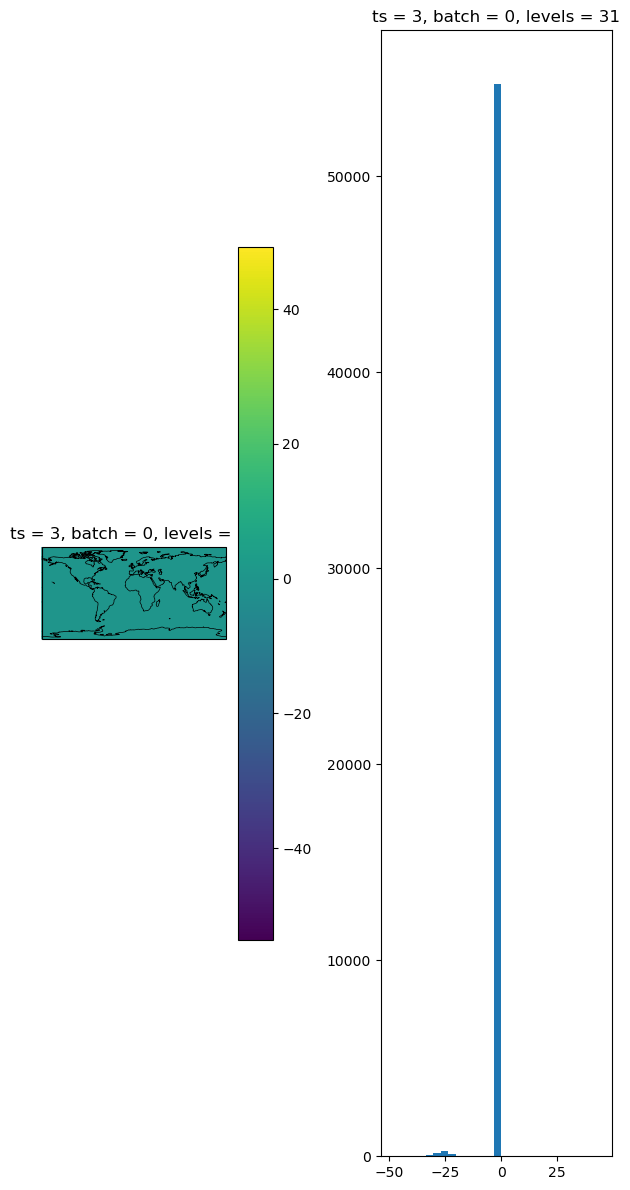

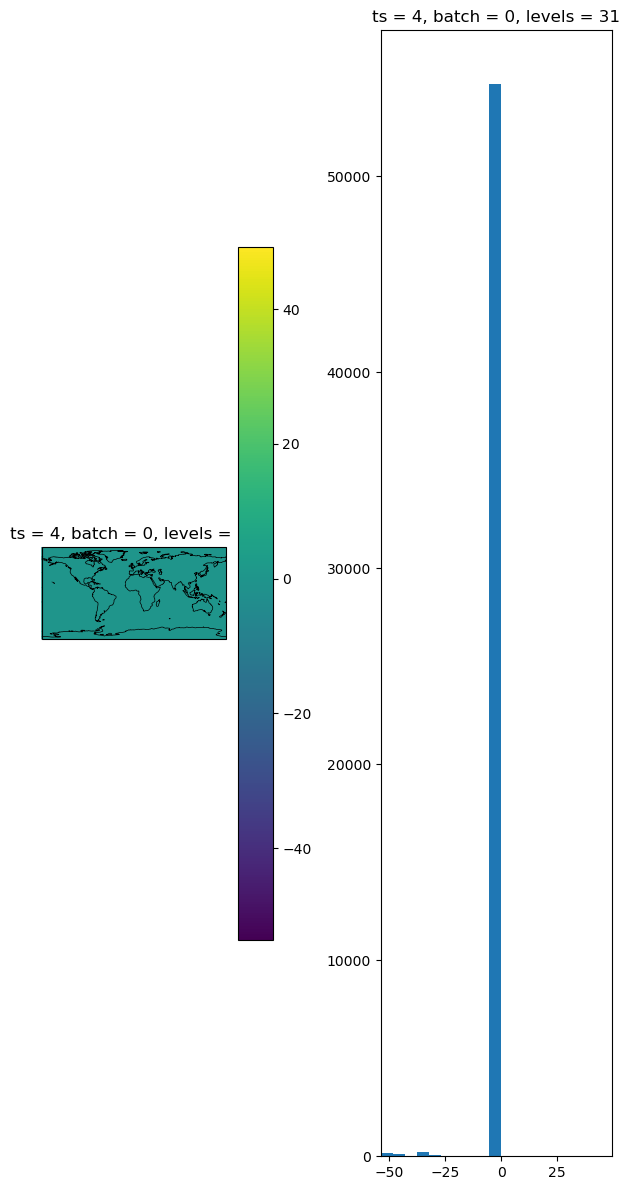

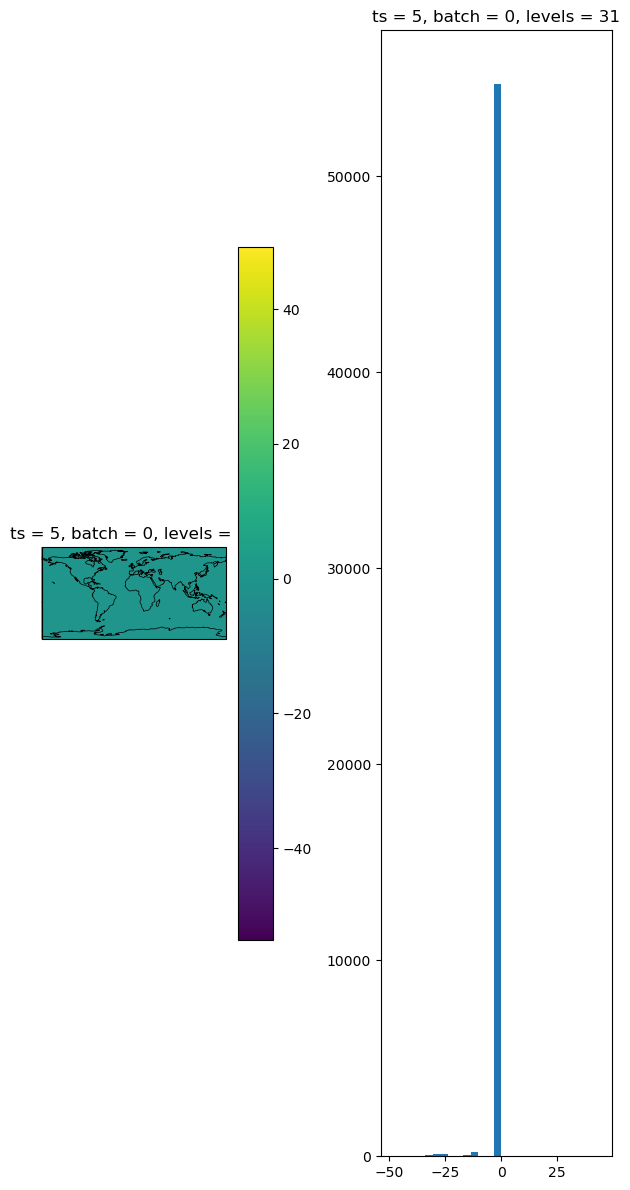

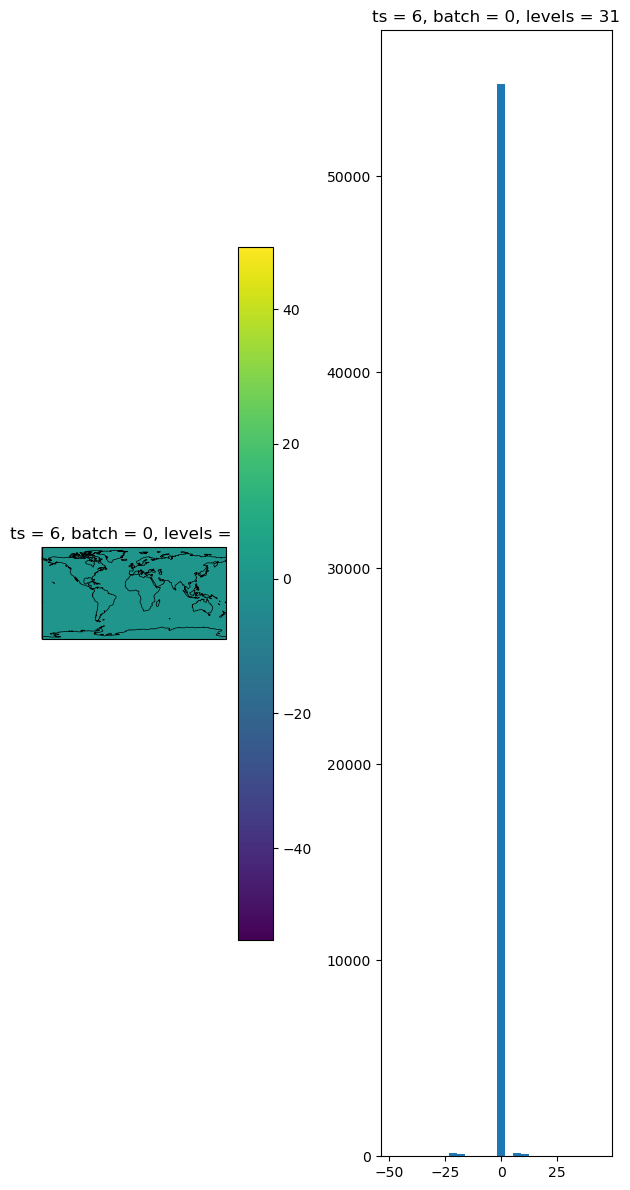

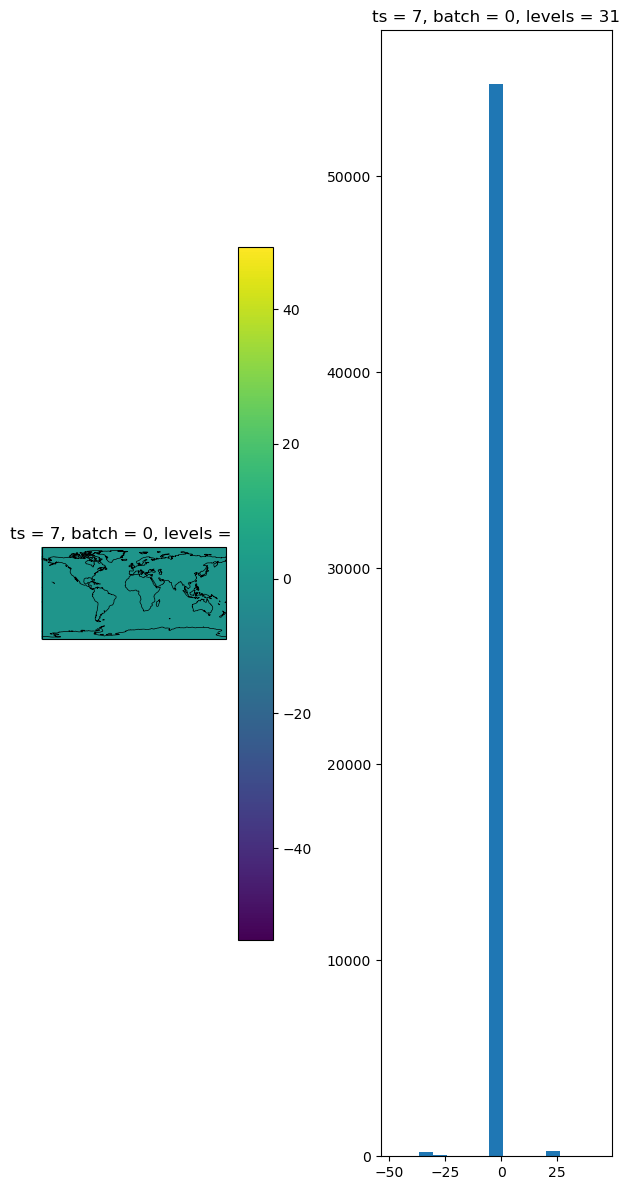

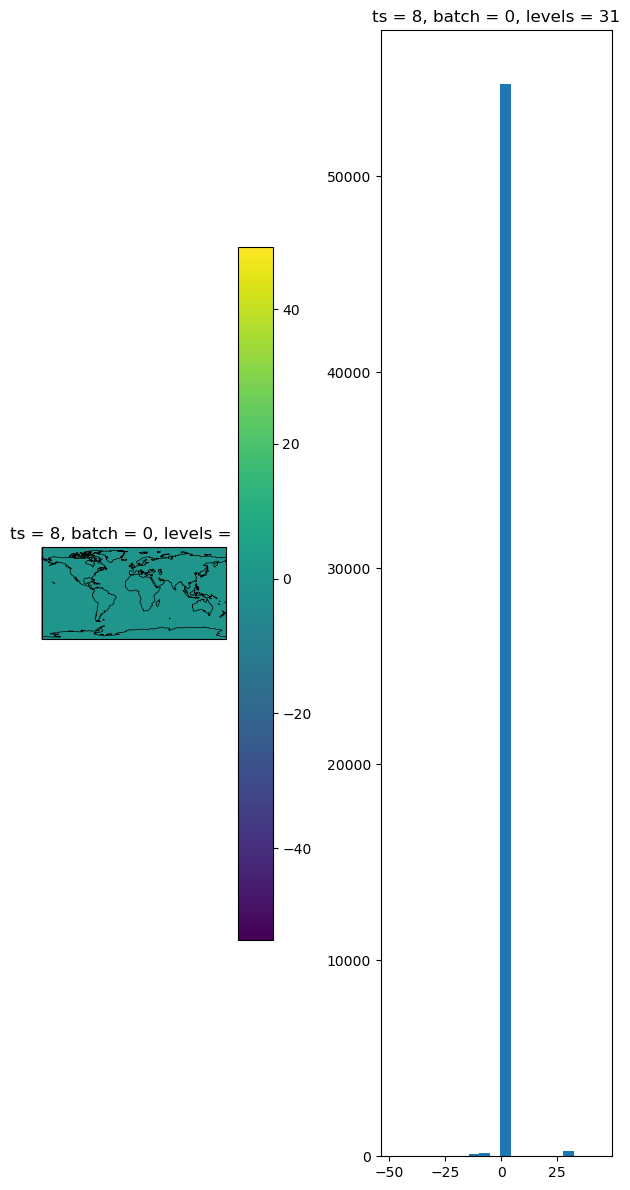

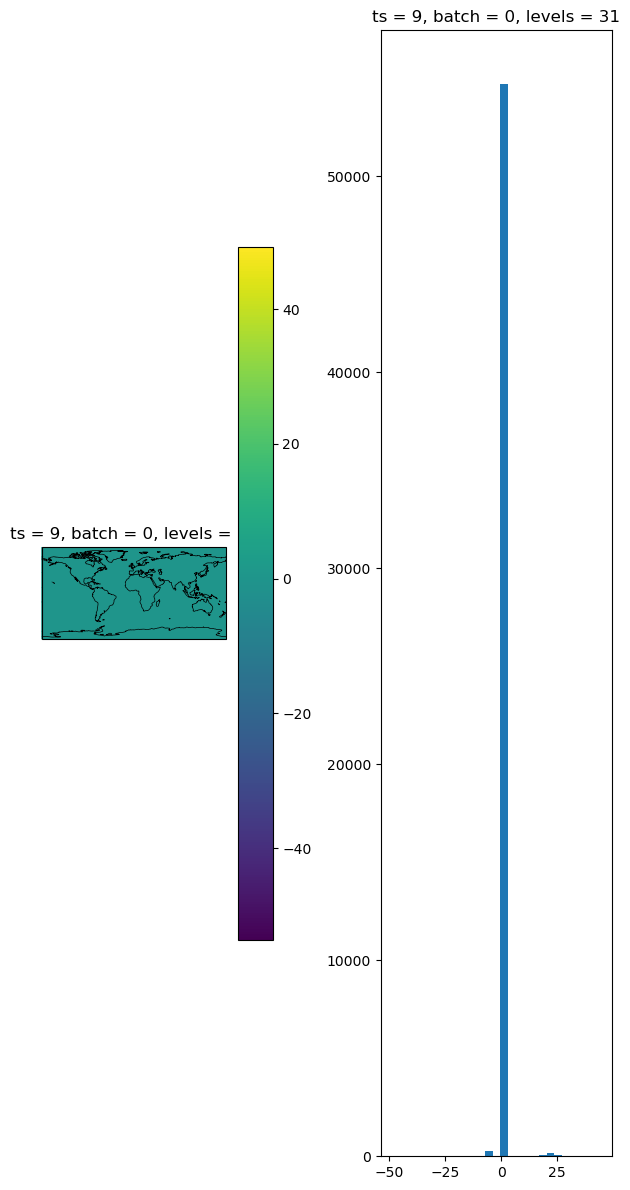

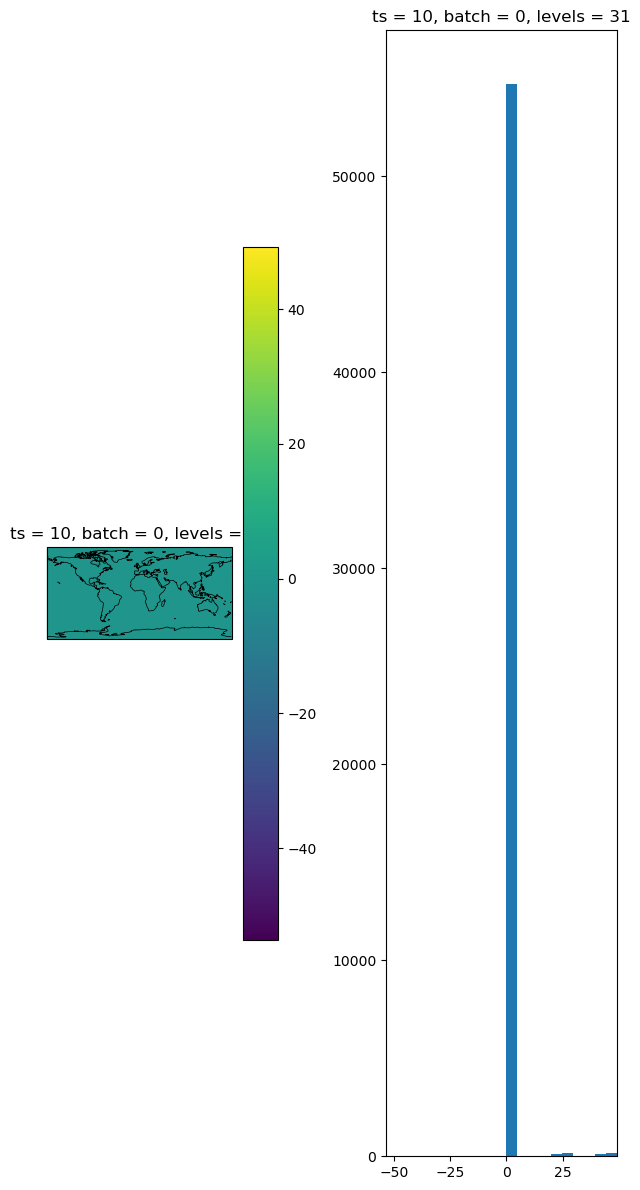

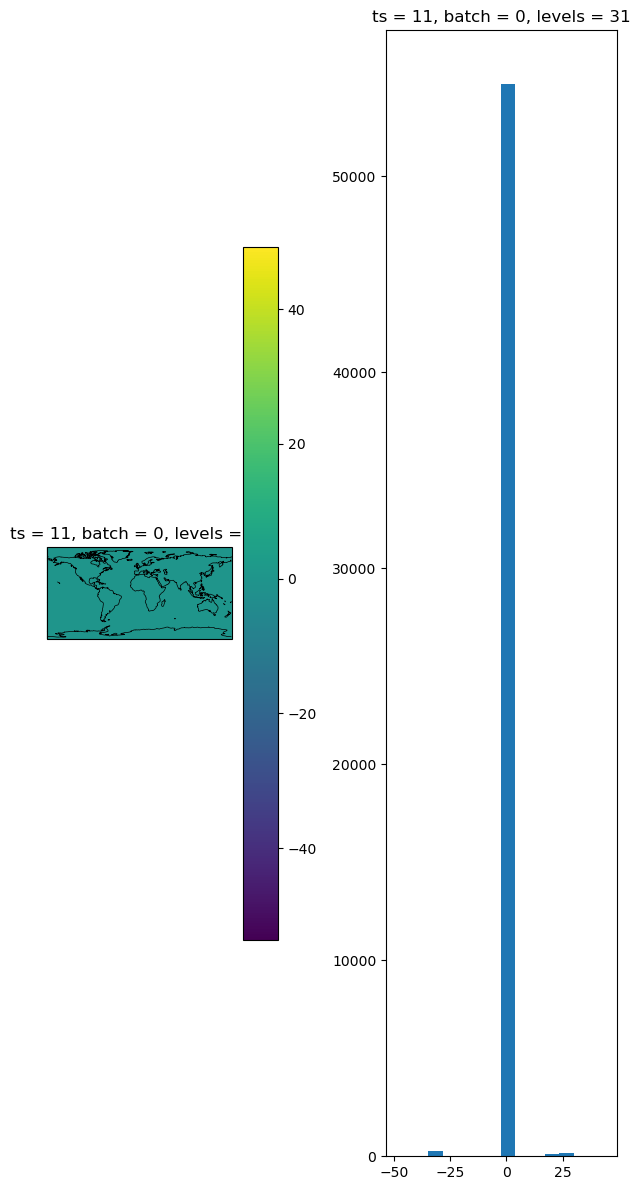

In [63]:
from doctest import debug

from matplotlib.gridspec import GridSpec


levels_to_plot = [0, 31]
for level in levels_to_plot:
    perturb_level = p_ds.sel(batch=0, levels=level)
    cmap_min, cmap_max = perturb_level.min(), perturb_level.max()

    for t in perturb_level.ts.values:
        perturb_lev = perturb_level.sel(ts=t)
        fig = plt.figure(figsize=(6, 12))
        gs = GridSpec(2, 2, figure=fig, height_ratios=[2, 1])
        ax = fig.add_subplot(gs[:, 0], projection=ccrs.PlateCarree())
        contour = perturb_lev.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="viridis",
                                   vmin=cmap_min, vmax=cmap_max)
        ax.add_feature(COASTLINE, linewidth=0.5)
        print(perturb_lev.min().values, perturb_lev.max().values)
        ax = fig.add_subplot(gs[:, 1])

        # fig, ax = plt.subplots(figsize=(10, 5))
        perturb_lev.plot.hist(ax = ax, xlim=(cmap_min, cmap_max))
        plt.tight_layout()
        fig.savefig(join(debug_folder, f"perturb_img_{t}.png"))

        # fig.savefig(join(debug_folder, f"perturb_hist_{t}_img.png"))

    # with imageio.get_writer(join(debug_folder, f'perturb_lv{level}.gif'), mode='I', fps=2) as writer:
    #     for i in perturb_level.ts.values:
    #         filename = f'perturb_img_{i}.png'
    #         image = imageio.imread(join(debug_folder, filename))
    #         writer.append_data(image)

In [33]:
perturb_lev

<xarray.DataArray (latitude: 192, longitude: 288)> Size: 442kB
array([[-2.36565110e+01, -2.33859953e+01, -2.32974459e+01, ...,
        -2.33875074e+01, -2.33041898e+01, -2.35915936e+01],
       [-3.86296278e-03, -3.82745252e-03, -3.83967664e-03, ...,
        -3.53904423e-03, -3.44712371e-03, -3.66829105e-03],
       [-1.84519047e-03, -1.86419837e-03, -1.89859313e-03, ...,
        -1.66773325e-03, -1.64540455e-03, -1.75056050e-03],
       ...,
       [-3.25051905e-02, -1.57010318e-01, -1.45060184e-01, ...,
        -6.29620197e-03, -7.17016516e-03, -1.02322216e-02],
       [-7.64777484e-03, -7.15420228e-03, -6.95810618e-03, ...,
        -1.64594592e-02, -1.51552243e-02, -1.29271468e-02],
       [-2.80283214e+01, -2.73813393e+01, -2.71900501e+01, ...,
        -3.03838104e+01, -3.00648324e+01, -2.97226655e+01]])
Coordinates:
    batch      int64 8B 0
    levels     int64 8B 31
  * latitude   (latitude) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8

In [18]:
p_ds

<xarray.DataArray (batch: 1, levels: 32, latitude: 192, longitude: 288)> Size: 14MB
array([[[[6.60040164e+01, 6.62002372e+01, 6.61723493e+01, ...,
          6.58000412e+01, 6.58785717e+01, 6.64818954e+01],
         [3.74831570e-01, 4.32948031e-01, 3.68523315e-01, ...,
          2.40395092e-01, 2.70765105e-01, 4.54208271e-01],
         [1.20525643e-01, 1.51666024e-01, 1.37496701e-01, ...,
          1.39050616e-01, 1.72153334e-01, 1.85509633e-01],
         ...,
         [2.16795247e-03, 2.12934756e-03, 2.16938642e-03, ...,
          2.11775379e-03, 2.15846802e-03, 2.14069281e-03],
         [4.09030744e-03, 4.02203654e-03, 4.08479698e-03, ...,
          4.01417942e-03, 4.08015859e-03, 4.04545992e-03],
         [4.09593612e+01, 4.07497224e+01, 4.08858726e+01, ...,
          4.09082018e+01, 4.10695549e+01, 4.09868067e+01]],

        [[6.42876883e+01, 6.42293031e+01, 6.41967851e+01, ...,
          6.39925285e+01, 6.39592576e+01, 6.41743134e+01],
         [4.26731601e-02, 4.28778899e-02, 4.18014918e-02, ...,
          4.17352772e-02, 4.08482025e-02, 4.34328776e-02],
         [2.28237696e-02, 2.25551609e-02, 2.21215496e-02, ...,
          2.13771814e-02, 2.11612629e-02, 2.25990299e-02],
...
         [3.97505759e-03, 3.87987624e-03, 3.85173841e-03, ...,
          3.75145225e-03, 3.81623190e-03, 3.83906513e-03],
         [9.71715535e-03, 9.36012775e-03, 9.26022353e-03, ...,
          8.72129106e-03, 8.97781527e-03, 9.13540670e-03],
         [3.94209411e+01, 3.94740980e+01, 3.93974159e+01, ...,
          3.88104109e+01, 3.88177486e+01, 3.91830158e+01]],

        [[4.57045403e+01, 4.55533949e+01, 4.56139137e+01, ...,
          4.54798863e+01, 4.55700585e+01, 4.58085490e+01],
         [1.43397031e-02, 1.38777417e-02, 1.37533114e-02, ...,
          1.42824821e-02, 1.44955077e-02, 1.53189369e-02],
         [5.44178900e-03, 5.25527377e-03, 5.28684020e-03, ...,
          5.72118240e-03, 5.85058730e-03, 5.90007935e-03],
         ...,
         [6.31556493e-03, 5.97540009e-03, 6.16711071e-03, ...,
          5.70808247e-03, 6.00681836e-03, 6.22365081e-03],
         [1.65946939e-02, 1.50184146e-02, 1.56677748e-02, ...,
          1.37549862e-02, 1.48324348e-02, 1.55313501e-02],
         [4.34510190e+01, 4.34140694e+01, 4.34664011e+01, ...,
          4.28774204e+01, 4.28787486e+01, 4.29113640e+01]]]])
Coordinates:
  * batch      (batch) int64 8B 0
  * levels     (levels) int64 256B 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * latitude   (latitude) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * longitude  (longitude) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8